# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
# If on colab, uncomment the following lines

!wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2020-10-25 19:00:45--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.03s   

2020-10-25 19:00:45 (2.11 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

0    1   2    3    4   5   6    7   ...   11   12   13  14  15  16   17   18
0   451   94  37   74  169  59   7  162  ...  178  394  130  63   6   6  198  204
1   680   95  46   76  162  66  11  162  ...  175  381  172  74   8   4  184  193
2   124   85  45   71  150  63   8  143  ...  171  307  179  72   2   3  187  196
3    72   92  39   91  191  62   8  176  ...  196  466  151  67   3  23  192  200
4   671  103  41   83  194  63   9  175  ...  199  455  138  65   7  30  197  206
5   704   99  52  104  177  55  10  210  ...  219  657  215  73   3   2  187  194
6   775   97  38   75  188  68   6  171  ...  199  450  137  74   2   6  197  199
7    94   84  45   66  154  65   6  145  ...  168  312  177  73   2   3  184  188
8   480  104  55  100  201  66  10  214  ...  224  680  221  74   1   1  185  194
9   117  109  53  109  221  69  12  221  ...  226  712  212  72  13  28  188  201
10  318   89  37   51  111  54   5  120  ...  138  213  147  82   7   4  181  183
11  144   95  45   80  186  62   7  164  ...  188  406  178  65  11  18  199  204
12  407   91  38   75  136  53   6  144  ...  165  305  149  69   1   7  186  191
13  643   95  43   83  198  69   6  177  ...  189  484  163  68   6   4  196  198
14  375  109  52   95  189  58   4  227  ...  262  776  217  82   0  19  187  186

[15 rows x 19 columns]

Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

0           1           2   ...          16          17          18
count  549.000000  549.000000  549.000000  ...  549.000000  549.000000  549.000000
mean   422.275046   93.635701   44.728597  ...   12.038251  188.752277  195.324226
std    247.391079    8.361052    6.255007  ...    8.890678    6.100184    7.409341
min      0.000000   73.000000   33.000000  ...    0.000000  176.000000  181.000000
25%    203.000000   87.000000   39.000000  ...    5.000000  184.000000  190.000000
50%    416.000000   93.000000   44.000000  ...   10.000000  188.000000  196.000000
75%    639.000000  100.000000   49.000000  ...   18.000000  193.000000  201.000000
max    845.000000  119.000000   58.000000  ...   40.000000  206.000000  211.000000

[8 rows x 19 columns]

In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [7]:
X_train_pd_norm = X_train_pd
X_train_pd_norm = ((X_train_pd - X_train_pd.min()) / (X_train_pd[:].max() - X_train_pd[:].min()) - 0.5)

In [8]:
X_train_pd.describe()

0           1           2   ...          16          17          18
count  549.000000  549.000000  549.000000  ...  549.000000  549.000000  549.000000
mean   422.275046   93.635701   44.728597  ...   12.038251  188.752277  195.324226
std    247.391079    8.361052    6.255007  ...    8.890678    6.100184    7.409341
min      0.000000   73.000000   33.000000  ...    0.000000  176.000000  181.000000
25%    203.000000   87.000000   39.000000  ...    5.000000  184.000000  190.000000
50%    416.000000   93.000000   44.000000  ...   10.000000  188.000000  196.000000
75%    639.000000  100.000000   49.000000  ...   18.000000  193.000000  201.000000
max    845.000000  119.000000   58.000000  ...   40.000000  206.000000  211.000000

[8 rows x 19 columns]

In [9]:
X_train_pd_norm.describe()

0           1           2   ...          16          17          18
count  549.000000  549.000000  549.000000  ...  549.000000  549.000000  549.000000
mean    -0.000266   -0.051398   -0.030856  ...   -0.199044   -0.074924   -0.022526
std      0.292771    0.181762    0.250200  ...    0.222267    0.203339    0.246978
min     -0.500000   -0.500000   -0.500000  ...   -0.500000   -0.500000   -0.500000
25%     -0.259763   -0.195652   -0.260000  ...   -0.375000   -0.233333   -0.200000
50%     -0.007692   -0.065217   -0.060000  ...   -0.250000   -0.100000    0.000000
75%      0.256213    0.086957    0.140000  ...   -0.050000    0.066667    0.166667
max      0.500000    0.500000    0.500000  ...    0.500000    0.500000    0.500000

[8 rows x 19 columns]

Я сделал нормализацию данных и их центрирование относительно 0. Что при введение регуляризации в моделях позволит оценивать все признаки одинаково качественно.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [19]:
from sklearn import linear_model as lin_mod
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

clf_lr = lin_mod.LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
clf_lr.fit(X_train_pd_norm, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.001, verbose=0,
                   warm_start=False)

In [21]:
f1_lr = f1_score(clf_lr.predict(X_test), y_test, average='micro')
acc = accuracy_score(clf_lr.predict(X_test), y_test)
print(f1_lr, acc)

0.26936026936026936 0.26936026936026936


In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 8)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [38]:
pca.fit(X_train_pd)
X_train_pd_PCA = pca.fit_transform(X_train_pd)
pca.fit(X_test)
X_test_PCA = pca.fit_transform(X_test)


In [41]:
pca.fit(data)
data_PCA = pca.fit_transform(data)
X_train_PCA, X_test_PCA, y_train, y_test = train_test_split(data_PCA, target, test_size=0.35)

Я выбрал количесво n_components в соответствии с количество features у которых десперсия превышала 10. 10, так как таких features было 8, что больше 1/4, но меньше 1/2 от общего количества.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [42]:
clf_lr2 = lin_mod.LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
clf_lr2.fit(X_train_PCA, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.001, verbose=0,
                   warm_start=False)

In [44]:
f1_lr2 = f1_score(clf_lr2.predict(X_test_PCA), y_test, average='macro')
acc_lr2 = accuracy_score(clf_lr2.predict(X_test_PCA), y_test)
print(f1_lr2, acc_lr2)

0.5518840599293448 0.5656565656565656


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

score_f1 = []
score_acc = []
for i in range(1, 50):
  DTC = DecisionTreeClassifier(max_depth = i)
  res = cross_validate(DTC, data_PCA, target, cv = 5, scoring = ['f1_macro', 'accuracy'])
  score_f1.append(res['test_f1_macro'].mean())
  score_acc.append(res['test_accuracy'].mean())


In [ ]:
import matplotlib.pyplot as plt

x = [j for j in range(1, 50)]
plt.plot(x, score_f1)

In [ ]:
x = [j for j in range(1, 50)]
plt.plot(x, score_acc)

Как видно из графиков после 12 смысла увеличивать глубину нет.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

score_f1 = []
score_acc = []
for i in range(10, 200, 5):
  RF = RandomForestClassifier(n_estimators = i)
  res = cross_validate(RF, data_PCA, target, cv = 5, scoring = ['f1_macro', 'accuracy'])
  score_f1.append(res['test_f1_macro'].mean())
  score_acc.append(res['test_accuracy'].mean())

In [ ]:
x = [j for j in range(10, 200, 5)]
plt.plot(x, score_f1)

In [ ]:
x = [j for j in range(10, 200, 5)]
plt.plot(x, score_acc)

Оптимальный размер леса при 70 деревьях.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

score_f1 = []
score_acc = []
for i in range(1, 50):
  DTC = DecisionTreeClassifier(max_depth = i)
  res = cross_validate(DTC, data_PCA, target, cv = 5, scoring = ['f1_macro', 'accuracy'])
  score_f1.append(res['test_f1_macro'].mean())
  score_acc.append(res['test_accuracy'].mean())


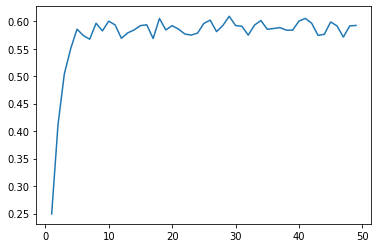

In [66]:
import matplotlib.pyplot as plt

x = [j for j in range(1, 50)]
plt.plot(x, score_f1)

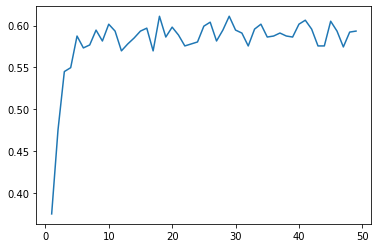

In [67]:
x = [j for j in range(1, 50)]
plt.plot(x, score_acc)

Как видно из графиков после 12 смысла увеличивать глубину нет.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [69]:
from sklearn.ensemble import RandomForestClassifier

score_f1 = []
score_acc = []
for i in range(10, 200, 5):
  RF = RandomForestClassifier(n_estimators = i)
  res = cross_validate(RF, data_PCA, target, cv = 5, scoring = ['f1_macro', 'accuracy'])
  score_f1.append(res['test_f1_macro'].mean())
  score_acc.append(res['test_accuracy'].mean())

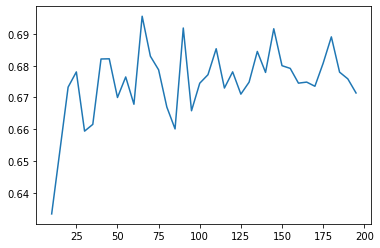

In [70]:
x = [j for j in range(10, 200, 5)]
plt.plot(x, score_f1)

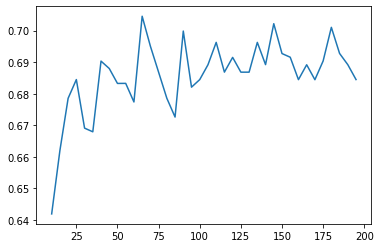

In [71]:
x = [j for j in range(10, 200, 5)]
plt.plot(x, score_acc)

Оптимальный размер леса при 70 деревьях.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE